In [ ]:
from matplotlib import pyplot
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt                                                                         

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load dataset


In [ ]:
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


# Summarize loaded dataset

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


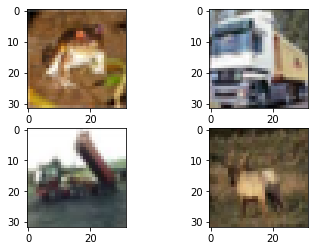

In [ ]:
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))
# plot some images
for i in range(4):
	pyplot.subplot(220 + 1 + i)
	pyplot.imshow(train_X[i])
pyplot.show()

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *

In [ ]:
#train_X = train_X.reshape(np.shape(train_X)[0], -1)
#test_X = test_X.reshape(np.shape(test_X)[0], -1)

# one hot y values
train_Y = to_categorical(train_y)
test_Y = to_categorical(test_y)

# Preprocessing

In [ ]:
# convert from integers to floats
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# normalize to range 0-1
train_X = train_X / 255.0
test_X = test_X / 255.0

In [ ]:
# split training hyperpatameters batch
split = int(train_X.shape[0] * 0.2)
hyperbatch_X = train_X[:split]
hyperbatch_Y = train_Y[:split]
hyperbatch_X.shape

(10000, 32, 32, 3)

In [ ]:
!pip install talos

     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 9.5 MB 9.0 MB/s 
     |████████████████████████████████| 5.4 MB 57.1 MB/s 
ERROR: Operation cancelled by user
^C


# Define model

In [ ]:
import talos as ta
from talos.model.normalizers import lr_normalizer

ModuleNotFoundError: ignored

In [ ]:
def choose_hyperparams(nodes_number, activation):
  # define model
  model = Sequential()
  # define layeres
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  # compile and fit
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
  history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))

  return history

In [ ]:
def draw_acc_loss_plt(history):
  # acc
  plt.plot(history.history['acc'], 'b-')
  plt.plot(history.history['val_acc'], 'r-')
  plt.show()
  # loss
  plt.plot(history.history['loss'], 'b-')
  plt.plot(history.history['val_loss'], 'r-')
  plt.show()

In [ ]:
history = choose_hyperparams(20, 'relu')
draw_acc_loss_plt(history)

Epoch 1/30


KeyboardInterrupt: ignored

Epoch 1/30
313/313 [==============================] - 3s 9ms/step - loss: 2.0176 - acc: 0.2751 - val_loss: 1.8329 - val_acc: 0.3615
Epoch 2/30
313/313 [==============================] - 3s 8ms/step - loss: 1.7301 - acc: 0.4034 - val_loss: 1.7332 - val_acc: 0.4069
Epoch 3/30
313/313 [==============================] - 2s 7ms/step - loss: 1.6057 - acc: 0.4471 - val_loss: 1.6224 - val_acc: 0.4354
Epoch 4/30
313/313 [==============================] - 2s 7ms/step - loss: 1.5376 - acc: 0.4782 - val_loss: 1.5623 - val_acc: 0.4641
Epoch 5/30
313/313 [==============================] - 2s 7ms/step - loss: 1.4759 - acc: 0.4958 - val_loss: 1.5388 - val_acc: 0.4704
Epoch 6/30
313/313 [==============================] - 2s 7ms/step - loss: 1.4346 - acc: 0.5150 - val_loss: 1.5119 - val_acc: 0.4757
Epoch 7/30
313/313 [==============================] - 3s 8ms/step - loss: 1.3979 - acc: 0.5319 - val_loss: 1.4860 - val_acc: 0.4818
Epoch 8/30
313/313 [==============================] - 3s 8ms/step - loss: 1.

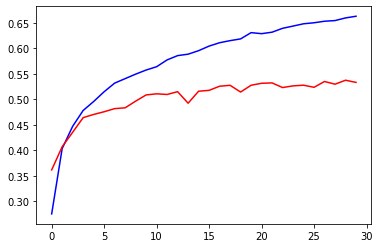

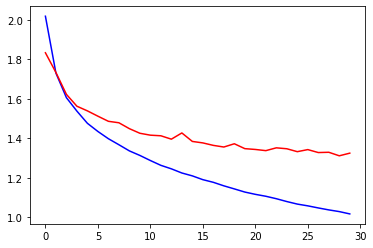

In [ ]:
history = choose_hyperparams(200, 'relu')
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 3s 9ms/step - loss: 2.0305 - acc: 0.2664 - val_loss: 1.8374 - val_acc: 0.3715
Epoch 2/30
313/313 [==============================] - 2s 7ms/step - loss: 1.7648 - acc: 0.3865 - val_loss: 1.7346 - val_acc: 0.3944
Epoch 3/30
313/313 [==============================] - 3s 8ms/step - loss: 1.6565 - acc: 0.4243 - val_loss: 1.6644 - val_acc: 0.4238
Epoch 4/30
313/313 [==============================] - 2s 7ms/step - loss: 1.5839 - acc: 0.4511 - val_loss: 1.6093 - val_acc: 0.4331
Epoch 5/30
313/313 [==============================] - 3s 8ms/step - loss: 1.5225 - acc: 0.4741 - val_loss: 1.5883 - val_acc: 0.4522
Epoch 6/30
313/313 [==============================] - 3s 8ms/step - loss: 1.4754 - acc: 0.4965 - val_loss: 1.5384 - val_acc: 0.4650
Epoch 7/30
313/313 [==============================] - 3s 8ms/step - loss: 1.4260 - acc: 0.5171 - val_loss: 1.4955 - val_acc: 0.4824
Epoch 8/30
313/313 [==============================] - 3s 8ms/step - loss: 1.

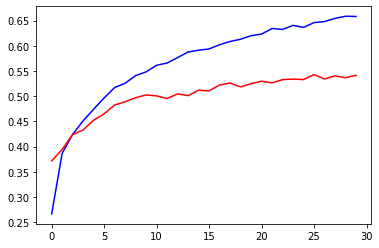

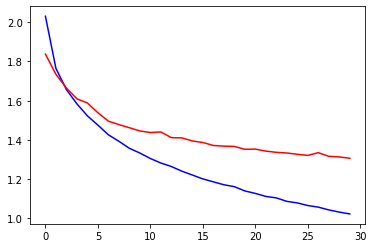

In [ ]:
history = choose_hyperparams(1000, 'relu')
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 39s 124ms/step - loss: 1.9946 - acc: 0.2893 - val_loss: 1.8222 - val_acc: 0.3698
Epoch 2/30
313/313 [==============================] - 2s 7ms/step - loss: 1.7443 - acc: 0.3986 - val_loss: 1.7180 - val_acc: 0.4042
Epoch 3/30
313/313 [==============================] - 3s 8ms/step - loss: 1.6267 - acc: 0.4355 - val_loss: 1.6567 - val_acc: 0.4091
Epoch 4/30
313/313 [==============================] - 2s 7ms/step - loss: 1.5423 - acc: 0.4769 - val_loss: 1.5634 - val_acc: 0.4588
Epoch 5/30
313/313 [==============================] - 2s 7ms/step - loss: 1.4826 - acc: 0.4985 - val_loss: 1.5377 - val_acc: 0.4676
Epoch 6/30
313/313 [==============================] - 2s 7ms/step - loss: 1.4330 - acc: 0.5165 - val_loss: 1.5158 - val_acc: 0.4693
Epoch 7/30
313/313 [==============================] - 2s 7ms/step - loss: 1.3922 - acc: 0.5291 - val_loss: 1.4738 - val_acc: 0.4882
Epoch 8/30
313/313 [==============================] - 3s 8ms/step - loss:

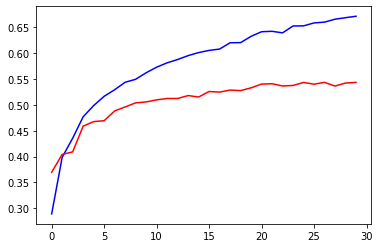

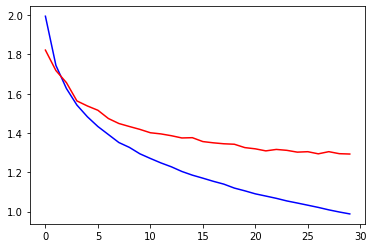

In [ ]:
history = choose_hyperparams(2000, 'relu')
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 3s 9ms/step - loss: 2.0155 - acc: 0.2689 - val_loss: 1.8515 - val_acc: 0.3506
Epoch 2/30
313/313 [==============================] - 3s 8ms/step - loss: 1.7601 - acc: 0.3892 - val_loss: 1.7070 - val_acc: 0.4113
Epoch 3/30
313/313 [==============================] - 2s 7ms/step - loss: 1.6542 - acc: 0.4235 - val_loss: 1.6483 - val_acc: 0.4289
Epoch 4/30
313/313 [==============================] - 2s 7ms/step - loss: 1.5730 - acc: 0.4545 - val_loss: 1.5927 - val_acc: 0.4428
Epoch 5/30
313/313 [==============================] - 3s 8ms/step - loss: 1.5074 - acc: 0.4796 - val_loss: 1.5484 - val_acc: 0.4584
Epoch 6/30
313/313 [==============================] - 3s 8ms/step - loss: 1.4619 - acc: 0.4958 - val_loss: 1.5364 - val_acc: 0.4676
Epoch 7/30
313/313 [==============================] - 2s 7ms/step - loss: 1.4162 - acc: 0.5141 - val_loss: 1.4921 - val_acc: 0.4789
Epoch 8/30
313/313 [==============================] - 2s 7ms/step - loss: 1.

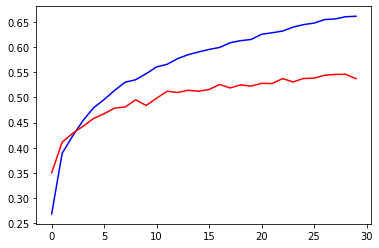

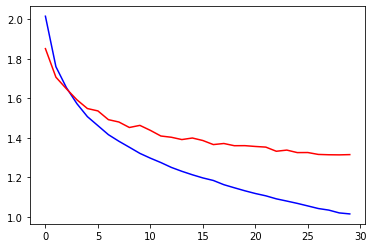

In [ ]:
history = choose_hyperparams(200, 'elu')
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 3s 8ms/step - loss: 2.0013 - acc: 0.2838 - val_loss: 1.8333 - val_acc: 0.3573
Epoch 2/30
313/313 [==============================] - 2s 7ms/step - loss: 1.7215 - acc: 0.4016 - val_loss: 1.6881 - val_acc: 0.4162
Epoch 3/30
313/313 [==============================] - 3s 8ms/step - loss: 1.6166 - acc: 0.4438 - val_loss: 1.6136 - val_acc: 0.4450
Epoch 4/30
313/313 [==============================] - 2s 7ms/step - loss: 1.5398 - acc: 0.4726 - val_loss: 1.5979 - val_acc: 0.4421
Epoch 5/30
313/313 [==============================] - 2s 7ms/step - loss: 1.4811 - acc: 0.4952 - val_loss: 1.5279 - val_acc: 0.4721
Epoch 6/30
313/313 [==============================] - 2s 7ms/step - loss: 1.4345 - acc: 0.5117 - val_loss: 1.5092 - val_acc: 0.4711
Epoch 7/30
313/313 [==============================] - 2s 7ms/step - loss: 1.3936 - acc: 0.5281 - val_loss: 1.4969 - val_acc: 0.4759
Epoch 8/30
313/313 [==============================] - 3s 8ms/step - loss: 1.

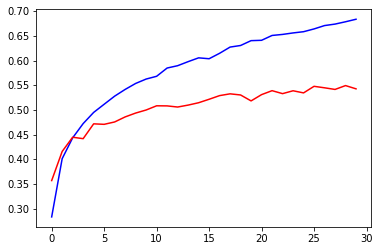

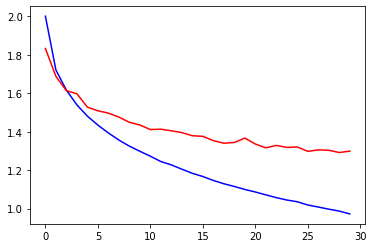

In [ ]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 3s 8ms/step - loss: 1.9877 - acc: 0.2930 - val_loss: 1.8197 - val_acc: 0.3811
Epoch 2/30
313/313 [==============================] - 2s 7ms/step - loss: 1.7097 - acc: 0.4113 - val_loss: 1.6751 - val_acc: 0.4202
Epoch 3/30
313/313 [==============================] - 2s 8ms/step - loss: 1.5924 - acc: 0.4556 - val_loss: 1.6227 - val_acc: 0.4337
Epoch 4/30
313/313 [==============================] - 3s 9ms/step - loss: 1.5150 - acc: 0.4835 - val_loss: 1.5588 - val_acc: 0.4533
Epoch 5/30
313/313 [==============================] - 2s 8ms/step - loss: 1.4530 - acc: 0.5034 - val_loss: 1.5067 - val_acc: 0.4812
Epoch 6/30
313/313 [==============================] - 2s 8ms/step - loss: 1.4030 - acc: 0.5251 - val_loss: 1.5035 - val_acc: 0.4757
Epoch 7/30
313/313 [==============================] - 3s 9ms/step - loss: 1.3625 - acc: 0.5425 - val_loss: 1.4670 - val_acc: 0.4941
Epoch 8/30
313/313 [==============================] - 2s 7ms/step - loss: 1.

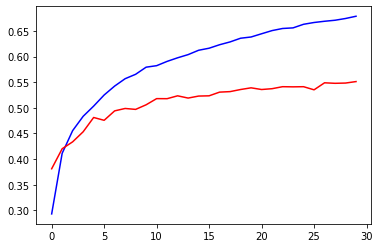

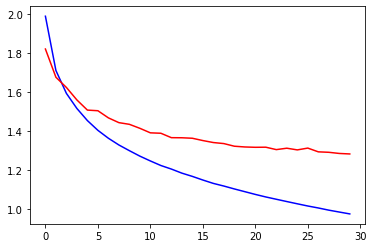

In [ ]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Nadam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 3s 8ms/step - loss: 2.0057 - acc: 0.2803 - val_loss: 1.8485 - val_acc: 0.3553
Epoch 2/30
313/313 [==============================] - 3s 8ms/step - loss: 1.7561 - acc: 0.3886 - val_loss: 1.7293 - val_acc: 0.3951
Epoch 3/30
313/313 [==============================] - 3s 9ms/step - loss: 1.6486 - acc: 0.4280 - val_loss: 1.6915 - val_acc: 0.4020
Epoch 4/30
313/313 [==============================] - 2s 7ms/step - loss: 1.5758 - acc: 0.4538 - val_loss: 1.6497 - val_acc: 0.4201
Epoch 5/30
313/313 [==============================] - 2s 7ms/step - loss: 1.5213 - acc: 0.4751 - val_loss: 1.5788 - val_acc: 0.4456
Epoch 6/30
313/313 [==============================] - 2s 7ms/step - loss: 1.4740 - acc: 0.4911 - val_loss: 1.5426 - val_acc: 0.4571
Epoch 7/30
313/313 [==============================] - 2s 7ms/step - loss: 1.4355 - acc: 0.5054 - val_loss: 1.5213 - val_acc: 0.4642
Epoch 8/30
313/313 [==============================] - 2s 7ms/step - loss: 1.

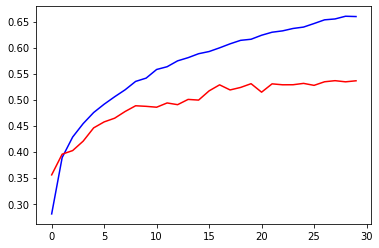

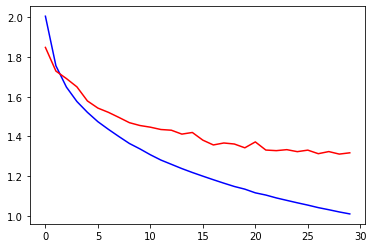

In [ ]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 4s 10ms/step - loss: 2.0057 - acc: 0.2832 - val_loss: 1.8149 - val_acc: 0.3656
Epoch 2/30
313/313 [==============================] - 3s 8ms/step - loss: 1.7270 - acc: 0.4002 - val_loss: 1.7033 - val_acc: 0.4062
Epoch 3/30
313/313 [==============================] - 3s 8ms/step - loss: 1.6245 - acc: 0.4403 - val_loss: 1.6355 - val_acc: 0.4306
Epoch 4/30
313/313 [==============================] - 2s 7ms/step - loss: 1.5579 - acc: 0.4672 - val_loss: 1.6020 - val_acc: 0.4398
Epoch 5/30
313/313 [==============================] - 2s 7ms/step - loss: 1.5069 - acc: 0.4802 - val_loss: 1.5647 - val_acc: 0.4542
Epoch 6/30
313/313 [==============================] - 2s 7ms/step - loss: 1.4538 - acc: 0.4994 - val_loss: 1.5368 - val_acc: 0.4543
Epoch 7/30
313/313 [==============================] - 3s 8ms/step - loss: 1.4131 - acc: 0.5152 - val_loss: 1.5019 - val_acc: 0.4767
Epoch 8/30
313/313 [==============================] - 2s 7ms/step - loss: 1

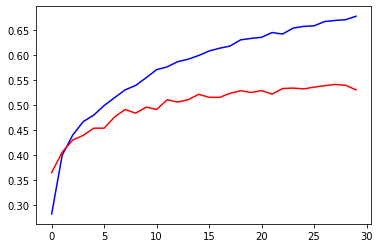

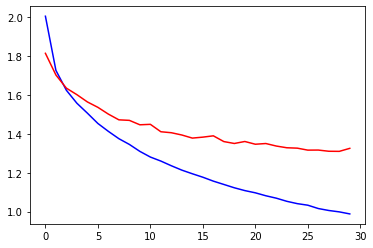

In [ ]:
nodes_number = 2048
# define model
model = Sequential()
# define layeres
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 7s 20ms/step - loss: 1.9833 - acc: 0.2829 - val_loss: 1.7176 - val_acc: 0.3893
Epoch 2/30
313/313 [==============================] - 6s 19ms/step - loss: 1.5990 - acc: 0.4250 - val_loss: 1.5503 - val_acc: 0.4382
Epoch 3/30
313/313 [==============================] - 6s 19ms/step - loss: 1.4369 - acc: 0.4873 - val_loss: 1.4562 - val_acc: 0.4781
Epoch 4/30
313/313 [==============================] - 6s 19ms/step - loss: 1.3405 - acc: 0.5242 - val_loss: 1.3751 - val_acc: 0.5132
Epoch 5/30
313/313 [==============================] - 6s 18ms/step - loss: 1.2424 - acc: 0.5639 - val_loss: 1.3737 - val_acc: 0.5131
Epoch 6/30
313/313 [==============================] - 6s 19ms/step - loss: 1.1484 - acc: 0.5988 - val_loss: 1.3103 - val_acc: 0.5406
Epoch 7/30
313/313 [==============================] - 6s 19ms/step - loss: 1.0666 - acc: 0.6246 - val_loss: 1.2251 - val_acc: 0.5727
Epoch 8/30
313/313 [==============================] - 6s 19ms/step - 

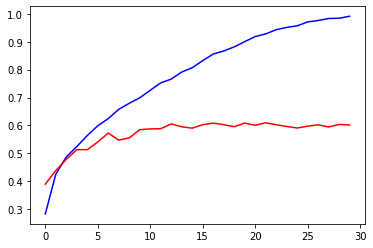

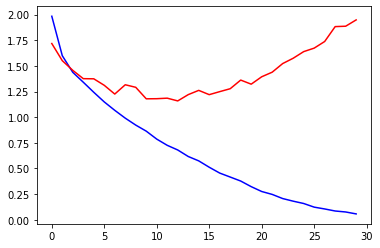

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
#model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 7s 21ms/step - loss: 2.2110 - acc: 0.1821 - val_loss: 1.9264 - val_acc: 0.3200
Epoch 2/30
313/313 [==============================] - 6s 19ms/step - loss: 1.8055 - acc: 0.3412 - val_loss: 1.6912 - val_acc: 0.3978
Epoch 3/30
313/313 [==============================] - 6s 19ms/step - loss: 1.6445 - acc: 0.4040 - val_loss: 1.5957 - val_acc: 0.4219
Epoch 4/30
313/313 [==============================] - 6s 19ms/step - loss: 1.5741 - acc: 0.4277 - val_loss: 1.5518 - val_acc: 0.4417
Epoch 5/30
313/313 [==============================] - 7s 22ms/step - loss: 1.5063 - acc: 0.4531 - val_loss: 1.4327 - val_acc: 0.4837
Epoch 6/30
313/313 [==============================] - 6s 19ms/step - loss: 1.4512 - acc: 0.4719 - val_loss: 1.4220 - val_acc: 0.4790
Epoch 7/30
313/313 [==============================] - 6s 19ms/step - loss: 1.3960 - acc: 0.4900 - val_loss: 1.3614 - val_acc: 0.5124
Epoch 8/30
313/313 [==============================] - 6s 19ms/step - 

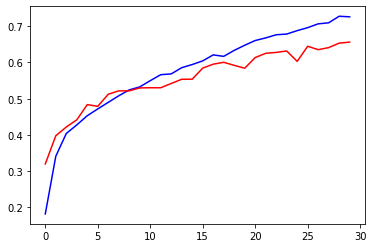

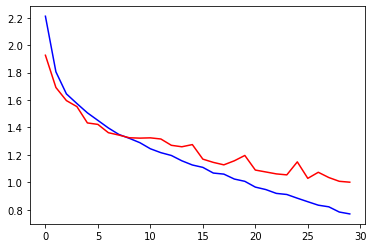

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
    
model.add(Dropout((0.3)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout((0.3)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
#model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

In [ ]:
# evaluate model
_, acc = model.evaluate(test_X, test_Y, verbose=0)
acc

0.6561999917030334

Epoch 1/30
313/313 [==============================] - 5s 13ms/step - loss: 2.1565 - acc: 0.2066 - val_loss: 1.9212 - val_acc: 0.3133
Epoch 2/30
313/313 [==============================] - 4s 12ms/step - loss: 1.8045 - acc: 0.3400 - val_loss: 1.7291 - val_acc: 0.3841
Epoch 3/30
313/313 [==============================] - 4s 12ms/step - loss: 1.6535 - acc: 0.3965 - val_loss: 1.6161 - val_acc: 0.4046
Epoch 4/30
313/313 [==============================] - 4s 11ms/step - loss: 1.5440 - acc: 0.4371 - val_loss: 1.5495 - val_acc: 0.4366
Epoch 5/30
313/313 [==============================] - 4s 12ms/step - loss: 1.4769 - acc: 0.4619 - val_loss: 1.4409 - val_acc: 0.4810
Epoch 6/30
313/313 [==============================] - 4s 12ms/step - loss: 1.3953 - acc: 0.4978 - val_loss: 1.3876 - val_acc: 0.5040
Epoch 7/30
313/313 [==============================] - 4s 12ms/step - loss: 1.3474 - acc: 0.5157 - val_loss: 1.3320 - val_acc: 0.5216
Epoch 8/30
313/313 [==============================] - 4s 13ms/step - 

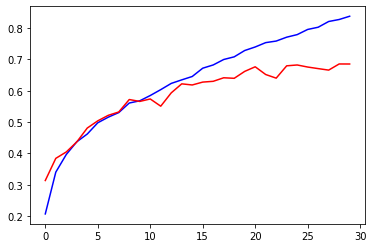

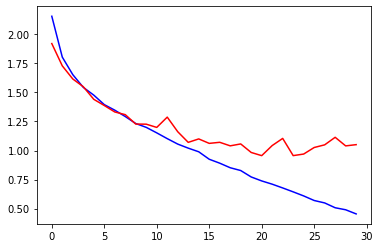

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
    
model.add(Dropout((0.45)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout((0.45)))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
#model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

# Train all 5 batches

Epoch 1/40
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9698 - acc: 0.2848 - val_loss: 1.6350 - val_acc: 0.4069
Epoch 2/40
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5439 - acc: 0.4324 - val_loss: 1.4662 - val_acc: 0.4736
Epoch 3/40
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3918 - acc: 0.4954 - val_loss: 1.4301 - val_acc: 0.4953
Epoch 4/40
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2718 - acc: 0.5426 - val_loss: 1.1680 - val_acc: 0.5839
Epoch 5/40
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1649 - acc: 0.5855 - val_loss: 1.2341 - val_acc: 0.5678
Epoch 6/40
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0748 - acc: 0.6196 - val_loss: 1.1314 - val_acc: 0.6021
Epoch 7/40
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0031 - acc: 0.6436 - val_loss: 1.1804 - val_acc: 0.5928
Epoch 8/40
1563/1563 [==============================] -

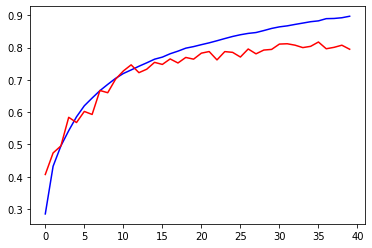

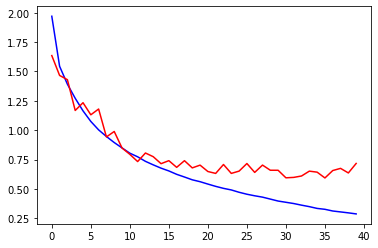

In [19]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
    
model.add(Dropout((0.65)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout((0.65)))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
#model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(train_X, train_Y, batch_size=32, epochs=40, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

In [20]:
# evaluate model
_, acc = model.evaluate(test_X, test_Y, verbose=0)
acc

0.794700026512146

In [ ]:
def breast_cancer_model(x_train, y_train, x_val, y_val, params):
  model = Sequential()
  # if we want to also test for number of layers and shapes, that's possible
  model.add(Dense(10, input_dim=x_train.shape[1],
                      activation=params['activation'],
                      kernel_initializer='normal'))
  model.add(Dropout(params['dropout']))
  #hidden_layers(model, params, 1)

  model.add(Dense(10, activation=params['last_activation'],
                      kernel_initializer='normal'))
  model.compile(loss=params['losses'],
                    # here we add a regulizer normalization function from Talos
                    optimizer=params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer'])),
                    metrics=['acc'])
  history = model.fit(x_train, y_train, 
                          validation_data=[x_val, y_val],
                          batch_size=params['batch_size'],
                          epochs=params['epochs'],
                          verbose=0)
  #model.add(Dense(200, activation='relu', input_dim=np.shape(train_X)[1]))
  #model.add(Dense(10, activation='softmax'))
  # finally we have to make sure that history object and model are returned
  return history, model

In [ ]:
p = {'lr': (0.5, 5, 10),
     'first_neuron':[4, 8, 16, 32, 64],
     'hidden_layers':[0, 1, 2],
     'batch_size': (2, 30, 10),
     'epochs': [150],
     'dropout': (0, 0.5, 5),
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick','long_funnel'],
     'optimizer': [Adam, Nadam, RMSprop],
     'losses': [logcosh, binary_crossentropy],
     'activation':[relu, elu],
     'last_activation': [softmax]}

In [ ]:
# and run the experiment
t = ta.Scan(x=train_X,
            y=train_Y,
            model=breast_cancer_model,
            fraction_limit=0.01, 
            params=p,
            experiment_name='breast_cancer')








  0%|          | 0/1800 [00:00<?, ?it/s]

ValueError: ignored

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2010      
Total params: 616,610
Trainable params: 616,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# fit model
history = model.fit(train_X, train_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))

Epoch 1/30
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8741 - acc: 0.3375 - val_loss: 1.7631 - val_acc: 0.3756
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7106 - acc: 0.3974 - val_loss: 1.6847 - val_acc: 0.4035
Epoch 3/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6368 - acc: 0.4253 - val_loss: 1.6262 - val_acc: 0.4264
Epoch 4/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5876 - acc: 0.4433 - val_loss: 1.5921 - val_acc: 0.4382
Epoch 5/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5518 - acc: 0.4571 - val_loss: 1.5427 - val_acc: 0.4616
Epoch 6/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5180 - acc: 0.4682 - val_loss: 1.5290 - val_acc: 0.4665
Epoch 7/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4867 - acc: 0.4802 - val_loss: 1.4983 - val_acc: 0.4741
Epoch 8/30
1563/1563 [==============================] 

In [ ]:
# evaluate model
_, acc = model.evaluate(test_X, test_Y, verbose=0)
acc

0.5199000239372253